# Pitch Type Prediction App

## Imports

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics, model_selection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import tkinter as tk
from tkinter import ttk
import warnings
warnings.filterwarnings('ignore')

## Import Data and Create DataFrame

In [7]:
df = pd.read_csv("pitches.csv")
selected_columns = ["break_angle", "break_length", "spin_dir", "pitch_type"]
df = df[selected_columns]
df = df.dropna()
df_sample = df.sample(frac=0.01, random_state=1)
df_sample.head()

,break_angle,break_length,spin_dir,pitch_type
1412000,18.8,4.4,202.210,FF
872589,21.1,3.1,194.688,FF
2560587,-30.2,3.2,156.493,FF
2231783,2.7,7.4,207.866,SL
1019510,-5.0,3.1,181.244,FF


## Data Analysis Visualizations

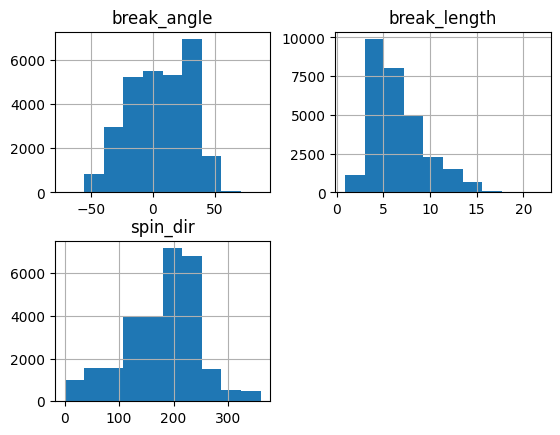

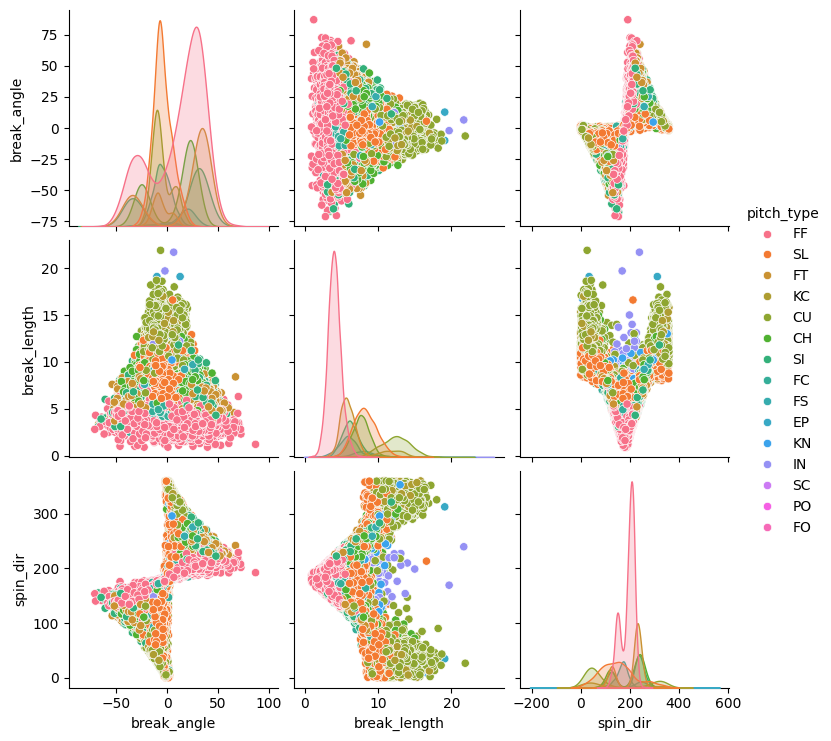

In [8]:
df_sample.hist()
sns.pairplot(df_sample, hue='pitch_type')
plt.show()

## Create Training Set

In [9]:
X = df_sample.drop("pitch_type", axis=1)
y = df_sample["pitch_type"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.3, random_state=1)

## Create K-Nearest Neighbors Classifier

In [10]:
myKn_model = KNeighborsClassifier(n_neighbors=14)

## Train Model

In [11]:
myKn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

## Measure Accuracy of KNN Model

In [12]:
y_pred_Kn = myKn_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_Kn)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6504264516882814


## Confusion Matrix

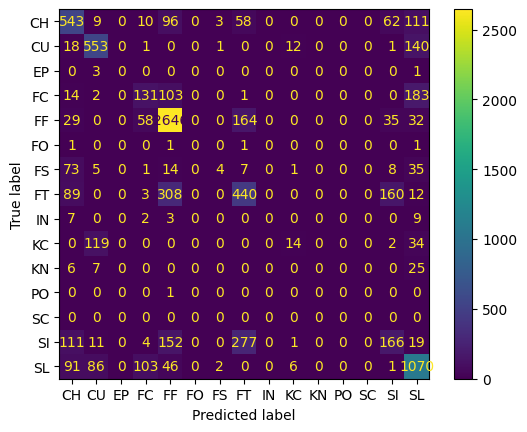

In [13]:
cm = metrics.confusion_matrix(y_test, y_pred_Kn, labels=myKn_model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= myKn_model.classes_)
disp.plot()
plt.show()

## Create User Interface

In [14]:
def predict_pitch_type():
    # Get user input values
    user_input = [float(entry.get()) for entry in data_entries]

    # Make a prediction
    prediction = myKn_model.predict([user_input])

    # Display the predicted pitch type
    result_label.config(text=f"Predicted Pitch Type: {prediction[0]}")


# Create the main window
root = tk.Tk()
root.title("Pitch Type Prediction")

# Create entry labels and input fields
data_labels = ["Break Angle:", "Break Length:", "Spin Direction:"]
data_entries = []

for i, label_text in enumerate(data_labels):
    label = ttk.Label(root, text=label_text)
    label.grid(row=i, column=0, padx=10, pady=5, sticky="E")

    entry = ttk.Entry(root)
    entry.grid(row=i, column=1, padx=10, pady=5)
    data_entries.append(entry)

# Create a button to make predictions
predict_button = ttk.Button(root, text="Predict Pitch Type", command=predict_pitch_type)
predict_button.grid(row=len(data_labels), column=0, columnspan=2, pady=10)

# Display the predicted pitch type
result_label = ttk.Label(root, text="")
result_label.grid(row=len(data_labels) + 1, column=0, columnspan=2, pady=10)

## Run User Interface
Run the following cell to start the application.

Pitch Key:
* FF = four seam fastball
* SL = slider
* FT = two seam fastball
* KC = knucle curve
* CU = curveball
* CH = changeup
* SI = sinker
* FC = cutter
* FS = fastball
* EP = ephus
* KN = knucleball
* IN = intentional ball
* SC = screwball
* PO = Pitchout

In [15]:
root.mainloop()